## Observations and Insights

## Dependencies and starter code

In [3]:
# Observations:

#         1. There is a weak positive correlation between weight and tumor volume, which means the greater 
#            the heavier a mouse is, the higher the tumor volume would be. 
#         2. There is only one tumor volume outlier for Infunibol, which means the data is reliable. 
#            This observation could be supported by the result of the volume variance calculation for Infubinol, 
#            which is the highest among the top four drug regimen. 
#         3. Unfortunately, some of the mouse did not survive until the 45th timepoint. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress
import numpy as np
import random

mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = "Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#download csv to check data
# combined_data.to_csv('combined_data.csv')

## Summary statistics

In [6]:
# Calculate Mean, Median, Variance, Standard Deviation, Standard Error of the Mean (SEM)
regimen_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_var = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Generate a summary statistics table 
summary_stats = pd.DataFrame({"Volume Mean": regimen_mean, 
                              "Volume Median": regimen_median, "Volume Variance": regimen_var,
                             "Volume Standard Deviation": regimen_std, "Volume SEM": regimen_sem})
summary_stats

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [7]:
#Count Data points for each drug regimen 
regimen_data_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

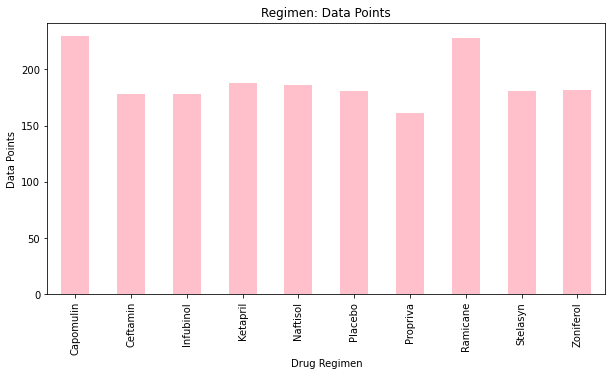

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data_points.plot(kind="bar", x ="Drug Regimen",
                         title = "Regimen: Data Points", figsize=(10,5), color = 'pink')
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

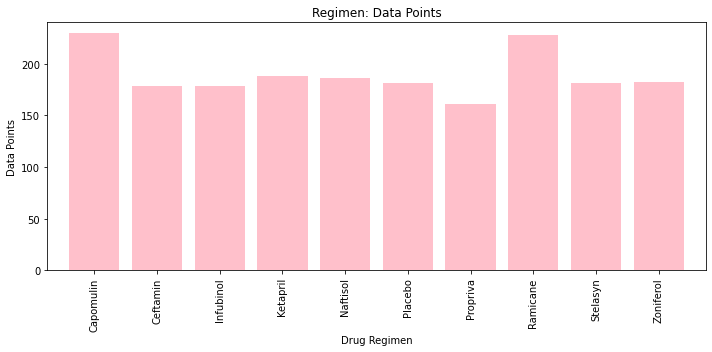

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen = ["Capomulin","Ceftamin", "Infubinol","Ketapril","Naftisol",
           "Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"]
data_points = [230, 178, 178, 188, 186, 181, 161, 228 ,181 ,182]

#Plot 
x_axis = np.arange(len(regimen_data_points))
plt.figure(figsize=(10,5))
plt.bar(x_axis, data_points, color='pink', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen, rotation = "vertical")
plt.title("Regimen: Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+10)
plt.tight_layout()
plt.savefig('Images/drug_regimen.png')

## Pie plots

In [10]:
#to find unique number of male and female, group by Mouse ID and Sex - can be listed multiple times based on timepoints, volume, etc..
gender_group = combined_data.groupby(["Mouse ID","Sex"])
# gender_group
gender_df = pd.DataFrame(gender_group.size())

#create dataframe
gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_df.columns = ["Total Count"]
gender_df["Sex Percentage"] = (100*(gender_df["Total Count"]/gender_df["Total Count"].sum()))
gender_df

,Total Count,Sex Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


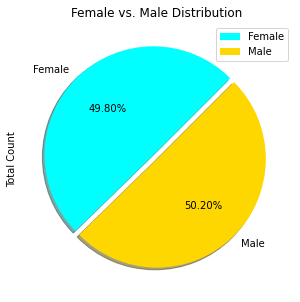

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['aqua', 'gold']
explode = [0.05,0]
gender_df.plot.pie(y = "Total Count", colors = colors, explode = explode,
                    title = "Female vs. Male Distribution", autopct="%2.2f%%", 
                   startangle=45, shadow = True, figsize=(6,5))

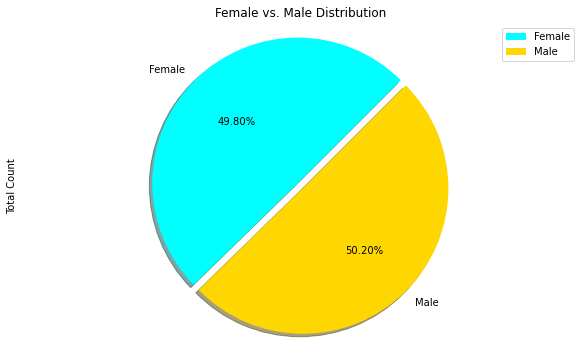

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]

colors = ['aqua', 'gold']
explode = (0.05, 0)

#Plot pie chart 
# plt.figure(figsize=(6,5))
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%2.2f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("Female vs. Male Distribution")
plt.ylabel("Total Count")
plt.legend(labels, loc="best")
plt.savefig('Images/gender.png')
plt.show()
plt.tight_layout()


## Quartiles, outliers and boxplots

In [20]:
#Did all mouse make it to the 45th timepoint? 
data_check = combined_data.groupby("Mouse ID").max()
data_check

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [21]:
#Extract top 4 regimens from the merged data frame using .isin()
top_four = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_regimes = combined_data[combined_data["Drug Regimen"].isin(top_four)]
# sort timepoint
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes

#Remove unwanted columns
top_df = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [22]:
#  group by Regimen and Mouse ID and use .last() to get the last tumor volume for each mouse
#  since not all mouse made it to the 45th timepoint
top_and_last = top_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_and_last.to_frame()
top_and_last = top_and_last.reset_index()
top_and_last

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [23]:
# For each of the four datasets, compute the IQR of the Tumor Volume.

# capomulin
capomulin = top_and_last[top_and_last["Drug Regimen"]=="Capomulin"]
quartiles = capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq1 = quartiles[0.25]
upperq1 = quartiles[0.75]
capomulin_iqr = upperq1-lowerq1

# ramicane
ramicane = top_and_last[top_and_last["Drug Regimen"]=="Ramicane"]
quartiles = ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
ramicane_iqr = upperq2-lowerq2


# infubinol 
infubinol = top_and_last[top_and_last["Drug Regimen"]=="Infubinol"]
quartiles = infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
infubinol_iqr = upperq3-lowerq3

# ceftamin 
ceftamin  = top_and_last[top_and_last["Drug Regimen"]=="Ceftamin"]
quartiles = ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq4 = quartiles[0.25]
upperq4 = quartiles[0.75]
ceftamin_iqr = upperq4-lowerq4

 
print(f"LQ,UP: Capomulin{lowerq1, upperq1}, Ramicane{lowerq2, upperq2}, Infubinol{lowerq3, upperq3}, Ceftamin{lowerq4, upperq4}")
print (f"IQR: Capomulin({capomulin_iqr}), Ramicane({ramicane_iqr}), Infubinol({infubinol_iqr}), Ceftamin({ceftamin_iqr})")

LQ,UP: Capomulin(32.37735684, 40.1592203), Ramicane(31.56046955, 40.65900627), Infubinol(54.04860769, 65.52574285), Ceftamin(48.72207785, 64.29983003)
IQR: Capomulin(7.781863460000004), Ramicane(9.098536719999998), Infubinol(11.477135160000003), Ceftamin(15.577752179999997)


In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# final_df = df.reset_index()
tumor_lists = top_and_last.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor_lists)
tumor_df
tumor_df = tumor_df.reindex(top_four)
tumor_df 

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


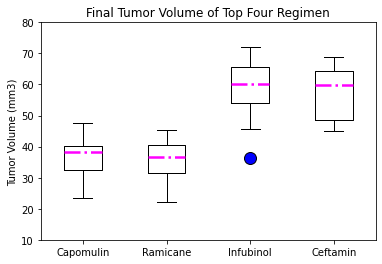

In [26]:
# generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style.
# Hint: All four box plots should be within the same figure. 

flierprops = dict(marker='o', markerfacecolor='blue', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='fuchsia')

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Top Four Regimen')
ax7.set_ylabel("Tumor Volume (mm3)")
tumor_vols = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_four, flierprops=flierprops, medianprops=medianprops)
plt.ylim(10, 80)
plt.savefig('Images/tumor.png')
plt.show()


## Line and scatter plots

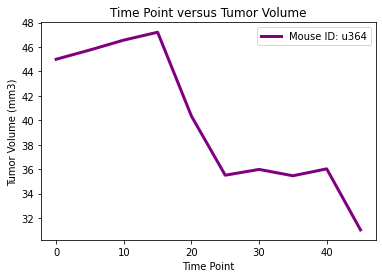

In [28]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

#get random mouse
# capomulin_mouse = combined_data.loc[combined_data['Drug Regimen']== "Capomulin"]
# capomulin_mouse 
# random_mouse = random.choice(capomulin_mouse['Mouse ID'])
random_mouse = "u364"

# located mouse target
one_mouse = combined_data.loc[combined_data['Mouse ID']==random_mouse]

tv = one_mouse['Tumor Volume (mm3)'].tolist()
tp = one_mouse['Timepoint'].tolist()

plt.title("Time Point versus Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(tp, tv, color="purple", linewidth=3, label="Mouse ID: u364")
plt.legend(loc="best")

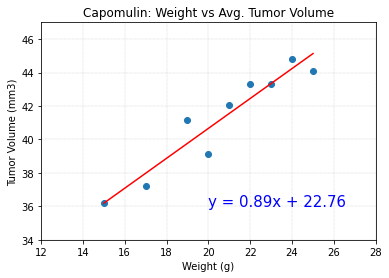

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = combined_data[combined_data["Drug Regimen"]=="Capomulin"]

# get average tumor volume for each weight group 
weight_group = capomulin_regimen.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# convert series above into a dataframe
weight_df = pd.DataFrame(weight_group).reset_index()
weight = weight_df["Weight (g)"]
volume = weight_df["Tumor Volume (mm3)"]

# plot scatter
plt.scatter(weight, volume)
plt.title("Capomulin: Weight vs Avg. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(12,28)
plt.ylim(34,47)
plt.grid(which='major', linestyle=':', linewidth='0.3', color='gray')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.savefig('Images/tumor_vol.png')
plt.show()


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between Mouse Weight and Tumor Volume is {round(st.pearsonr(weight,volume)[0],2)} (weak positive).")

The correlation coefficient between Mouse Weight and Tumor Volume is 0.95 (weak positive).


# Surivival Rates

In [31]:
survival_rates = combined_data.groupby(["Drug Regimen", "Timepoint"])
survival_ratesdf = survival_rates[["Mouse ID"]].nunique().rename(columns={"Mouse ID":"Mouse Count"})
survival_ratesdf.head()

Mouse Count
Drug Regimen Timepoint             
Capomulin    0                   25
             5                   25
             10                  25
             15                  24
             20                  23

In [32]:
# Reformat graph
reformatted = pd.pivot_table(survival_ratesdf, values='Mouse Count', index=['Timepoint'], columns=['Drug Regimen'])
reformatted.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17


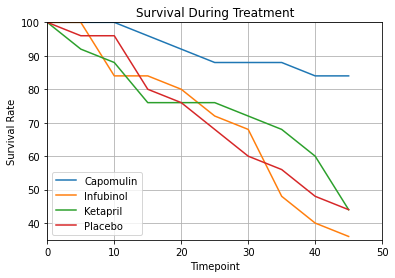

In [33]:
# Generate Plot
# Multiplied by 4 in order to get a percentage
plt.plot(np.arange(0, 50, 5), survival_ratesdf.loc["Capomulin", "Mouse Count"]*4, label = "Capomulin")
plt.plot(np.arange(0, 50, 5), survival_ratesdf.loc["Infubinol", "Mouse Count"]*4, label = "Infubinol")
plt.plot(np.arange(0, 50, 5), survival_ratesdf.loc["Ketapril", "Mouse Count"]*4, label = "Ketapril")
plt.plot(np.arange(0, 50, 5), survival_ratesdf.loc["Placebo", "Mouse Count"]*4,label = "Placebo")


plt.legend(loc="best")
plt.title('Survival During Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Survival Rate')
plt.xlim(0,50)
plt.ylim(35,100)
plt.grid()
plt.savefig('Images/survival.png')